In [1]:
import wbgapi as wb
import matplotlib.pyplot as plt

%matplotlib inline

/Users/damon/.pyenv/versions/3.7.0/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# get the data for the indicator: People using at least basic sanitation services (% of population)
sanitation_df = wb.data.DataFrame('SH.STA.BASS.ZS', numericTimeKeys=True).reset_index()
sanitation_df

,economy,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.485362,98.524766,98.564171,98.603575,98.642979,98.682384,98.721788,98.761193,98.800597,98.840002
1,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.160925,28.721573,29.305847,29.843791,30.382474,30.730436,31.158408,31.548450,31.501568,31.746333
2,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.564852,42.278403,44.001309,45.733602,47.477616,49.234144,51.003481,52.649001,54.298590,55.951941
3,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.700077,31.528615,32.367706,33.217056,34.081136,34.845974,35.733119,36.633950,37.531877,38.647432
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854792,46.117030,47.374483,48.627941,49.876983,51.120744,51.393623,51.660329,51.921684,52.177276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.882316,51.232112,51.568791,52.097811,52.617406,53.127018,53.626939,54.116638,54.595603,54.844758
263,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.651822,71.459434,72.259354,73.051466,73.835601,74.611680,75.379645,76.139455,76.890993,77.634246
264,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.857028,31.651222,32.435710,33.209394,33.971757,34.722069,35.459467,36.183254,36.241999,36.301369


In [3]:
# income level
income_lvl = wb.income.Series()
income_lvl

HIC            High income
INX         Not classified
LIC             Low income
LMC    Lower middle income
LMY    Low & middle income
MIC          Middle income
UMC    Upper middle income
Name: IncomeGroupName, dtype: object

In [4]:
# economies with their income level
economy_inc = wb.economy.DataFrame().reset_index()[['id', 'incomeLevel']]
economy_inc

,id,incomeLevel
0,ABW,HIC
1,AFE,
2,AFG,LIC
3,AFW,
4,AGO,LMC
...,...,...
261,XKX,UMC
262,YEM,LIC
263,ZAF,UMC
264,ZMB,LMC


In [5]:
# get the income group name for the economies
economy_inc = economy_inc.merge(income_lvl, how = 'left', left_on = 'incomeLevel', right_on = income_lvl.index)
economy_inc

,id,incomeLevel,IncomeGroupName
0,ABW,HIC,High income
1,AFE,,NaN
2,AFG,LIC,Low income
3,AFW,,NaN
4,AGO,LMC,Lower middle income
...,...,...,...
261,XKX,UMC,Upper middle income
262,YEM,LIC,Low income
263,ZAF,UMC,Upper middle income
264,ZMB,LMC,Lower middle income


In [6]:
# merge the income level info to the sanitation services table
sanitation_inc = sanitation_df.merge(economy_inc, how = 'left', left_on = 'economy', right_on = 'id')
sanitation_inc

,economy,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2016,2017,2018,2019,2020,2021,2022,id,incomeLevel,IncomeGroupName
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.603575,98.642979,98.682384,98.721788,98.761193,98.800597,98.840002,ABW,HIC,High income
1,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.843791,30.382474,30.730436,31.158408,31.548450,31.501568,31.746333,AFE,,NaN
2,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.733602,47.477616,49.234144,51.003481,52.649001,54.298590,55.951941,AFG,LIC,Low income
3,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.217056,34.081136,34.845974,35.733119,36.633950,37.531877,38.647432,AFW,,NaN
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.627941,49.876983,51.120744,51.393623,51.660329,51.921684,52.177276,AGO,LMC,Lower middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XKX,UMC,Upper middle income
262,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.097811,52.617406,53.127018,53.626939,54.116638,54.595603,54.844758,YEM,LIC,Low income
263,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.051466,73.835601,74.611680,75.379645,76.139455,76.890993,77.634246,ZAF,UMC,Upper middle income
264,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.209394,33.971757,34.722069,35.459467,36.183254,36.241999,36.301369,ZMB,LMC,Lower middle income


In [7]:
# drop unnecessary columns
sanitation_inc = sanitation_inc.drop(columns=['economy', 'id', 'incomeLevel'])
sanitation_inc

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,IncomeGroupName
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.524766,98.564171,98.603575,98.642979,98.682384,98.721788,98.761193,98.800597,98.840002,High income
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.721573,29.305847,29.843791,30.382474,30.730436,31.158408,31.548450,31.501568,31.746333,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.278403,44.001309,45.733602,47.477616,49.234144,51.003481,52.649001,54.298590,55.951941,Low income
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.528615,32.367706,33.217056,34.081136,34.845974,35.733119,36.633950,37.531877,38.647432,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.117030,47.374483,48.627941,49.876983,51.120744,51.393623,51.660329,51.921684,52.177276,Lower middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income
262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.232112,51.568791,52.097811,52.617406,53.127018,53.626939,54.116638,54.595603,54.844758,Low income
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.459434,72.259354,73.051466,73.835601,74.611680,75.379645,76.139455,76.890993,77.634246,Upper middle income
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.651222,32.435710,33.209394,33.971757,34.722069,35.459467,36.183254,36.241999,36.301369,Lower middle income


In [8]:
# remove the rows with no income group info
sanitation_inc  = sanitation_inc.dropna(subset=['IncomeGroupName'])
sanitation_inc

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,IncomeGroupName
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.524766,98.564171,98.603575,98.642979,98.682384,98.721788,98.761193,98.800597,98.840002,High income
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.278403,44.001309,45.733602,47.477616,49.234144,51.003481,52.649001,54.298590,55.951941,Low income
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.117030,47.374483,48.627941,49.876983,51.120744,51.393623,51.660329,51.921684,52.177276,Lower middle income
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.188022,97.654964,98.107903,98.547298,98.973646,99.183069,99.298793,99.299033,99.299266,Upper middle income
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,99.999996,100.000000,99.999996,99.999997,99.999999,100.000000,100.000000,High income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income
262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.232112,51.568791,52.097811,52.617406,53.127018,53.626939,54.116638,54.595603,54.844758,Low income
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.459434,72.259354,73.051466,73.835601,74.611680,75.379645,76.139455,76.890993,77.634246,Upper middle income
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.651222,32.435710,33.209394,33.971757,34.722069,35.459467,36.183254,36.241999,36.301369,Lower middle income


In [9]:
# calculate the average sanitation access population value by income groups
san_inc_avg = sanitation_inc.groupby('IncomeGroupName').mean()
san_inc_avg = san_inc_avg.drop('Not classified')
san_inc_avg

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
IncomeGroupName,,,,,,,,,,,,,,,,,,,,,
High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.012884,95.674372,95.758287,95.858551,95.914172,95.915541,95.999929,96.078027,96.141542,96.649575
Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.670155,30.357156,31.054510,31.767022,33.250851,33.948902,34.651836,35.280758,35.870420,36.372144
Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.170950,58.242536,59.331441,60.401995,61.373317,62.330016,63.247647,64.576738,64.598779,66.641096
Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.712640,86.258744,86.761667,87.219198,87.524245,88.341802,88.603857,88.840975,89.178987,89.425912


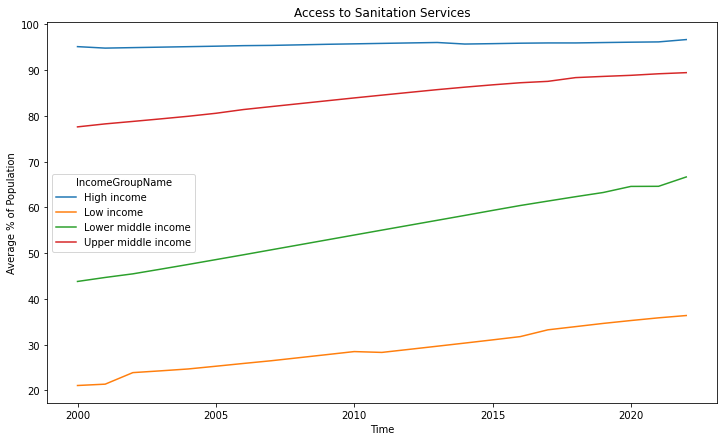

In [10]:
# plot the trend of the sanitation access
ax = san_inc_avg.transpose().plot(figsize=(12, 7), title='Access to Sanitation Services').set_ylabel('Average % of Population')
plt.xlabel("Time")
plt.show()

In [11]:
# export the chart
fig = ax.get_figure()
fig.savefig('Access to Sanitation Services.jpg', dpi=800)

## Summary

The focus of this discussion is the evolution of access to sanitation services, as measured by the average percentage of each income group’s population. The process involves two main stages: data preparation and analysis of findings. The data, which details the percentage of each country's population with access to basic sanitation services from 1960 onwards, was sourced from the World Bank API. The dataset shows the percentage of each country's population with sanitation access annually. To categorize countries by income level, income group information (such as High income and Low income) was added. Subsequently, the average percentage of population with sanitation access was calculated for each income group per year. This yielded the average percentage of the population with access to basic sanitation services per income group, annually from 1960. A multi-line chart was then created to depict the trend per income group over time. The chart begins in 2000 as the dataset's data starts from this year. The chart reveals a general increase in sanitation access over time. Notably, the Low income, Lower middle income, and Upper middle income groups show a consistent rise. The high income group remains steady. It's important to note that access to sanitation services varies by income group. The high income group consistently has the highest percentage of its population with sanitation access, followed by the Upper middle and Lower middle income groups. The low income group has the lowest percentage.